Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

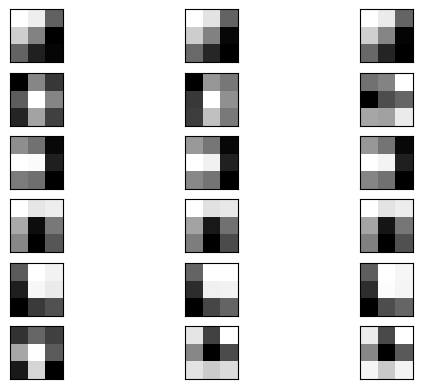

In [1]:
# summarize filters in each convolutional layer
from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot

# load the model
model = VGG16()
model.summary()
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

# retrieve weights from the first hidden layer
filters, biases = model.layers[1].get_weights()
print(model.layers[1].name)

# normalize filter values to 0-1 so we can visualize them
# 정규화
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()


175582/175582 [==============================] - 0s 0us/step


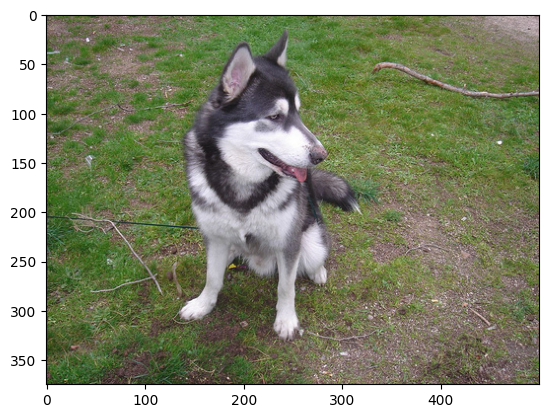

In [2]:
from matplotlib import image as mp_image
import matplotlib.pyplot as plt
from tensorflow import keras

url = 'https://raw.githubusercontent.com/kotech1/computervision/master/img/2011_002300-dog.jpg'

sample_image_path = keras.utils.get_file(
    "2011_002300-dog.jpg", url
)
image = mp_image.imread(sample_image_path)
plt.imshow(image)
plt.show()

1/1 [==============================] - 0s 106ms/step


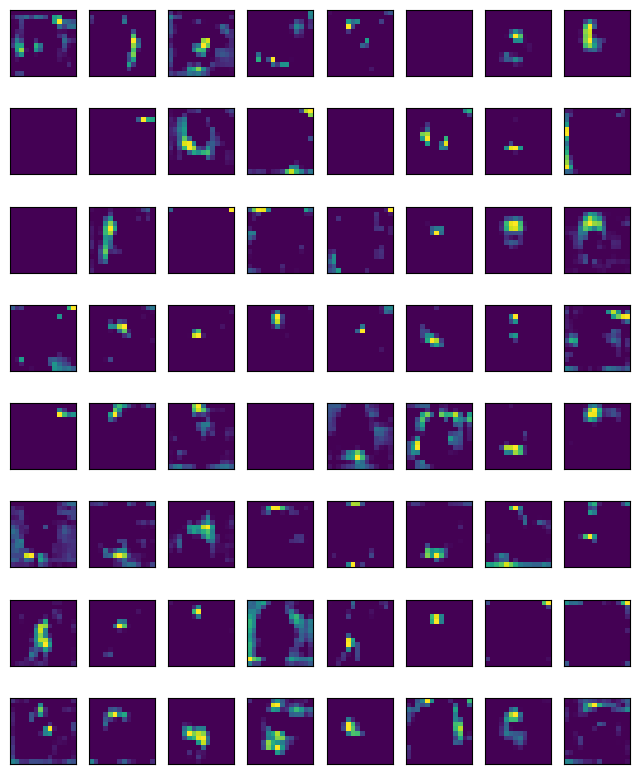

In [8]:
# plot feature map of first conv layer for given image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the model
model = VGG16()

# layer가 커지게 되면 maxpooling으로 화질이 압축됨
layer = 16  # 1 to 17
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[layer].output)
# load the image with the required shape
#img = load_img('bird.jpg', target_size=(224, 224))
img = load_img(sample_image_path, target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
offset = 0 # 0, 64, 128 ...
pyplot.figure(figsize=(8,10))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        #pyplot.imshow(feature_maps[0, :, :, ix-1+offset], cmap='gray')
        img = feature_maps[0, :, :, ix-1+offset]
        import numpy as np
        img = np.clip(img, -1000, 1000)
        #pyplot.imshow(feature_maps[0, :, :, ix-1+offset])
        pyplot.imshow(img)
        ix += 1
# show the figure
pyplot.show()